In [1]:
import numpy as np
import scipy as sp
import scipy.spatial as sp_spt
import scipy.optimize as sp_opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import gaussian_fitting as gaussfit
import fitting_2D as fit2D

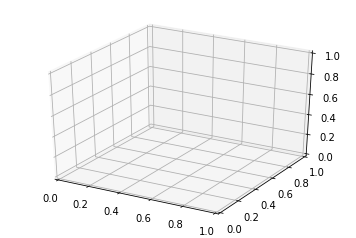

In [2]:
fig = plt.figure()
plot_3d = fig.add_subplot(111, projection='3d')

In [17]:
# Inital variables.
centers = [1,2]
std_devs = [1,3]
height = 2
x_domain = [-5,5]
y_domain = [-5,5]
noise_domain = [-1e-2,1e-2]
n_datapoints = 10000

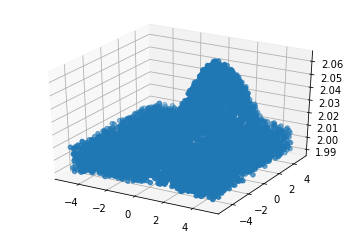

In [18]:
points = fit2D.generate_noisy_dual_dimension_gaussian(centers,std_devs,height,
                                           n_datapoints,x_domain,y_domain,
                                           noise_domain)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[0], points[1], points[2])
plt.show()



In [19]:
answers = fit2D.fit_dual_dimension_gaussian(points)
print(answers)

(array([1.00216268, 1.99276281]), array([1.03422578, 2.93350281]), 1.9970154221743797)


In [ ]:
sort_index = np.argsort(points[2])
points = points[:,sort_index]

plt.plot(points[0,-500:],points[1,-500:],'.')
plt.show()

average = np.average(points[2,:500],weights=(1/points[2,:500]**2))
print(average)

points[2] -= average

In [ ]:



plt.show()

cut = 1000
plt.plot(points[1,-cut:],points[2,-cut:],'.')
x_average = np.average(points[0,-cut:],weights=points[2,-cut:]**2)
y_average = np.average(points[1,-cut:],weights=points[2,-cut:]**2)
print(x_average,y_average)

points[0] -= x_average
points[1] -= y_average

In [ ]:
strip_width = .1

valid_points = np.where(np.abs(points[1]) <= strip_width)
strip_points = points[:,valid_points[0]]

plt.plot(strip_points[0],strip_points[2],'.')
#plt.show()

def subgauss(x_input,std_dev,amp):
    return ((amp * np.exp(-0.5 * ((x_input - 0)/std_dev)**2))
                    + 0)

ans = sp_opt.curve_fit(subgauss,strip_points[0],strip_points[2])
ans = tuple(ans[0])
print(ans)

x_plotting = np.linspace(-5,5,10000)
y_plotting = subgauss(x_plotting,ans[0],ans[1])
plt.plot(x_plotting,y_plotting)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[0], points[1], points[2])
plt.show()

In [ ]:
subpoints = np.array([points[0,-500:],points[1,-500:]])
#print(subpoints)
hull = sp_spt.ConvexHull(subpoints.T,incremental=True)
plt.plot(subpoints.T[hull.vertices,0], subpoints.T[hull.vertices,1], 'r--', lw=2)
plt.show()

circle_points = np.array([subpoints.T[hull.vertices,0],subpoints.T[hull.vertices,1]])
print(circle_points)